In this notebook, I merge various models' predictions.

In [9]:
import pandas as pd
%matplotlib inline

In [4]:
# TODO: Replace with absolute paths later.
BEST_STACKING_MODEL = "../stacking_ten_models_augmented_dataset_submission.csv"
BEST_NO_OUTLIERS_MODEL = "../hyperopt_xgboost_more_folds_more_iterations_shuffling_oof_no_outliers_augmented_dataset_submission.csv"
BEST_OUTLIERS_CLASSIFIER_MODEL = "../hyperopt_xgboost_more_folds_more_iterations_shuffling_oof_outliers_classification_augmented_dataset_submission.csv"
OUTLIERS_RATIO = 0.0106

In [5]:
stacking_df = pd.read_csv(BEST_STACKING_MODEL)
no_outliers_df = pd.read_csv(BEST_NO_OUTLIERS_MODEL)
outliers_classifier_df = pd.read_csv(BEST_OUTLIERS_CLASSIFIER_MODEL)

In [6]:
stacking_df.shape

(123623, 2)

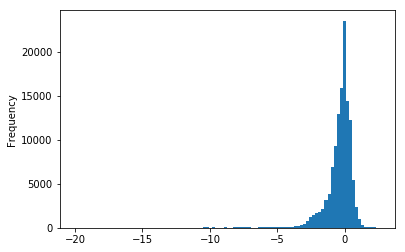

In [15]:
stacking_df['target'].plot(kind='hist', bins=100)

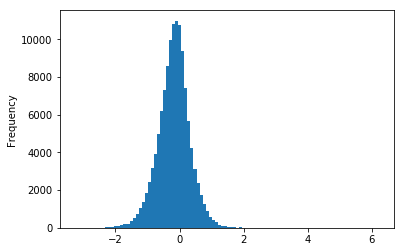

In [13]:
no_outliers_df['target'].plot(kind='hist', bins=100)

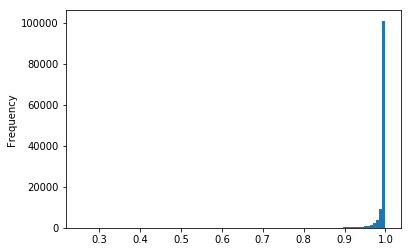

In [34]:
outliers_classifier_df['outliers'].plot(kind='hist', bins=100)

In [30]:
outliers_classifier_df.loc[(outliers_classifier_df['outliers'] > 0.9), 'outliers'].count()

121962

In [25]:
N_OUTLIERS = int(len(stacking_df) * OUTLIERS_RATIO)

In [41]:
N_OUTLIERS

1236

In [31]:
outliers_classifier_df.head()


,card_id,outliers
0,C_ID_0ab67a22ab,0.946842
1,C_ID_130fd0cbdd,0.999047
2,C_ID_b709037bc5,0.988190
3,C_ID_d27d835a9f,0.999922
4,C_ID_2b5e3df5c2,0.998710


TODO: There was probably a problem when assigning the ouliers proba. Investigate

# Find most likely outliers

In [84]:
ouliers_id_a = outliers_classifier_df.sort_values(by='outliers', ascending = True).head(25000)['card_id'].values

# Get predictions for most likely ouliers

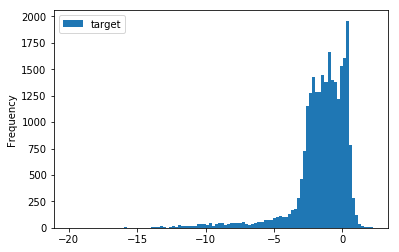

In [85]:
stacking_df.loc[lambda df: df['card_id'].isin(ouliers_id_a)].plot(y='target', kind='hist', bins=100)

In [86]:
outliers_df = stacking_df.loc[lambda df: df['card_id'].isin(ouliers_id_a)]

In [87]:
submission_df = (no_outliers_df.merge(outliers_df, on='card_id', suffixes=('_no_outliers', '_outliers'), how='left')
                               .assign(target=lambda df: pd.np.where(df.target_outliers.isna(), df['target_no_outliers'], df['target_outliers']))
                               .drop(['target_outliers', 'target_no_outliers'], axis=1))

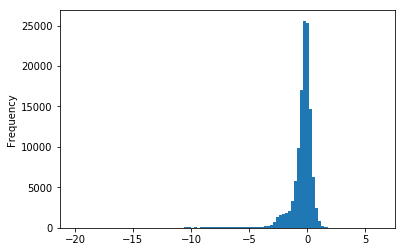

In [88]:
submission_df['target'].plot(kind='hist', bins=100)

In [90]:
submission_df.to_csv('../models_combination_25000_top_ouliers.csv', index=False)